In [ ]:
#Installing Necessary Libraries
!pip install tensorflow
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install Pillow
!pip install seaborn

#Methodologies
Certainly! Let's delve deeper into each phase, starting from the fundamentals.

### 1. Data Preprocessing:
Data preprocessing is a critical step in machine learning, ensuring that the data is in a suitable format for training. In this context, we're dealing with images of benign and malignant tumors. The first step is to load these images, but we need to ensure that we're not including any irrelevant images such as masks used for annotation. This is achieved by implementing a function that filters out such images. Then, we combine the images and their corresponding labels. Since machine learning models require numerical data, we convert the images into a format that the model can understand. This involves resizing the images to a fixed dimension and normalizing the pixel values, typically to a range between 0 and 1, to facilitate convergence during training. Finally, we split the dataset into training, testing, and validation sets to assess the model's performance accurately.

### 2. Model Development:
Convolutional Neural Networks (CNNs) are a class of deep learning models specifically designed for processing structured grid-like data, such as images. CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. In our case, the model architecture starts with a convolutional layer, which applies filters to the input image to extract features like edges and textures. This is followed by a pooling layer, which reduces the spatial dimensions of the feature maps while retaining the most important information. This process of convolution and pooling is repeated multiple times to learn increasingly abstract features. The final layers consist of fully connected (dense) layers, which perform classification based on the features learned by the previous layers.

### 3. Model Training:
Training a CNN involves feeding the preprocessed images through the model and adjusting the model's weights based on the error between the predicted outputs and the ground truth labels. This is done through a process called backpropagation, where the error is propagated backward through the network, and the gradients of the loss function with respect to each parameter are computed. These gradients are then used to update the parameters using optimization algorithms such as stochastic gradient descent (SGD) or more advanced variants like Adam. During training, the model's performance is monitored on a separate validation set to prevent overfitting, where the model becomes too specialized to the training data and performs poorly on unseen data.

### 4. Evaluation and Visualization:
Once the model is trained, it is evaluated on a held-out test set to assess its generalization performance. Various metrics such as accuracy, precision, recall, and F1-score are calculated to measure the model's effectiveness in classifying benign and malignant tumors. Additionally, a confusion matrix is generated to visualize the model's predictions, providing insights into its strengths and weaknesses. Visualizing the model's performance helps in understanding where it excels and where it struggles, enabling us to make informed decisions about potential improvements or areas for further investigation.

Regarding TensorFlow, it's a powerful open-source library for numerical computation and machine learning developed by Google. TensorFlow enables building and training machine learning models efficiently, particularly deep neural networks, by providing high-level APIs like Keras and low-level operations for defining and executing computational graphs. TensorFlow's flexibility and scalability make it suitable for a wide range of applications, from research prototyping to production deployment. To improve TensorFlow's efficiency, one can optimize the computational graph, utilize hardware acceleration, implement distributed computing strategies, and leverage pre-trained models and transfer learning techniques to reduce training time and resource consumption.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
from PIL import Image

In [ ]:
# Paths to your directories (Modify these paths according to your Google Drive directory structure)
benign_dir = "/content/drive/My Drive/benign_batch2"
malignant_dir = "/content/drive/My Drive/malignant"

# Function to load images while ignoring mask images
def load_data(image_dir):
    images = []
    labels = []
    for img_name in os.listdir(image_dir):
        # Ignore files containing '_mask'
        if '_mask' in img_name:
            continue
        img_path = os.path.join(image_dir, img_name)
        images.append(img_path)
        # Assuming benign images are in a directory named "benign" and malignant images are in a directory named "malignant"
        label = 0 if "benign" in image_dir else 1
        labels.append(label)

    return images, labels

# Loading benign and malignant data
benign_images, benign_labels = load_data(benign_dir)
malignant_images, malignant_labels = load_data(malignant_dir)

# Combining both benign and malignant data
all_images = benign_images + malignant_images
all_labels = benign_labels + malignant_labels

# Splitting the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define image dimensions
image_height, image_width = 224, 224

# Function to preprocess image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(image_height, image_width))
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

# Preprocessing images
X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])
X_val = np.array([preprocess_image(img) for img in X_val])

# Convert data to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train)
y_train_tf = tf.convert_to_tensor(y_train)
X_test_tf = tf.convert_to_tensor(X_test)
y_test_tf = tf.convert_to_tensor(y_test)
X_val_tf = tf.convert_to_tensor(X_val)
y_val_tf = tf.convert_to_tensor(y_val)

# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(X_train_tf, y_train_tf, epochs=12, validation_data=(X_val_tf, y_val_tf))

# Evaluate the model on test set
accuracy = model.evaluate(X_test_tf, y_test_tf)[1]

Epoch 1/12
10/10 [==============================] - 16s 1s/step - loss: 0.7261 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 2/12
10/10 [==============================] - 14s 1s/step - loss: 0.6893 - accuracy: 0.5066 - val_loss: 0.6735 - val_accuracy: 0.5588
Epoch 3/12
10/10 [==============================] - 13s 1s/step - loss: 0.6425 - accuracy: 0.7119 - val_loss: 0.6124 - val_accuracy: 0.7353
Epoch 4/12
10/10 [==============================] - 13s 1s/step - loss: 0.5241 - accuracy: 0.7483 - val_loss: 0.6546 - val_accuracy: 0.6765
Epoch 5/12
10/10 [==============================] - 14s 1s/step - loss: 0.4403 - accuracy: 0.7781 - val_loss: 0.6735 - val_accuracy: 0.7353
Epoch 6/12
10/10 [==============================] - 14s 1s/step - loss: 0.3617 - accuracy: 0.8278 - val_loss: 0.6328 - val_accuracy: 0.7059
Epoch 7/12
10/10 [==============================] - 14s 1s/step - loss: 0.2991 - accuracy: 0.8907 - val_loss: 0.6352 - val_accuracy: 0.7353
Epoch 8/12
10/10 [==

In [ ]:
accuracy = model.evaluate(X_test_tf, y_test_tf)[1]
print(accuracy)

3/3 [==============================] - 1s 285ms/step - loss: 0.6357 - accuracy: 0.8452
0.8452380895614624


3/3 [==============================] - 1s 293ms/step
Accuracy: 0.8452380895614624
Precision: 0.8823529411764706
Recall: 0.7692307692307693
F1-score: 0.8219178082191781
Confusion Matrix:
[[41  4]
 [ 9 30]]


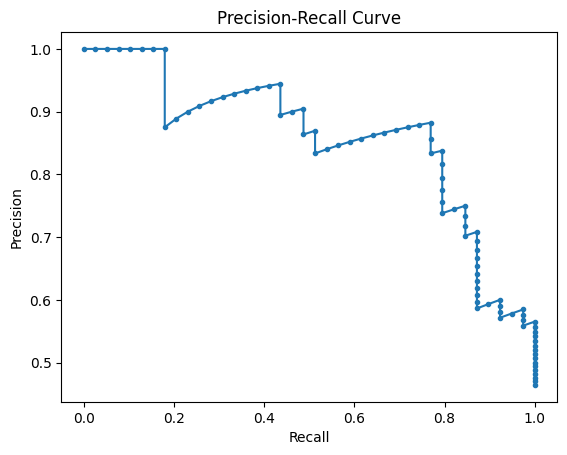

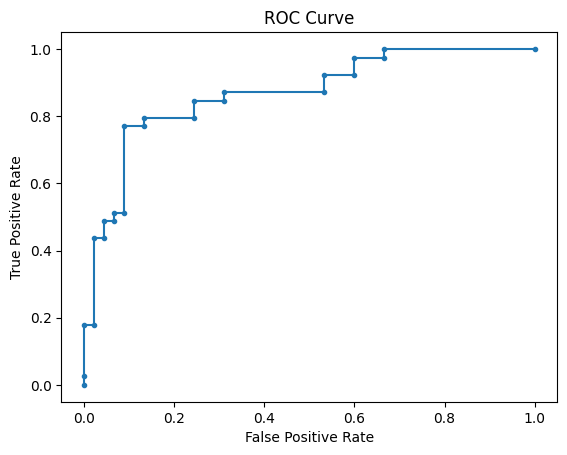

<Figure size 640x480 with 0 Axes>

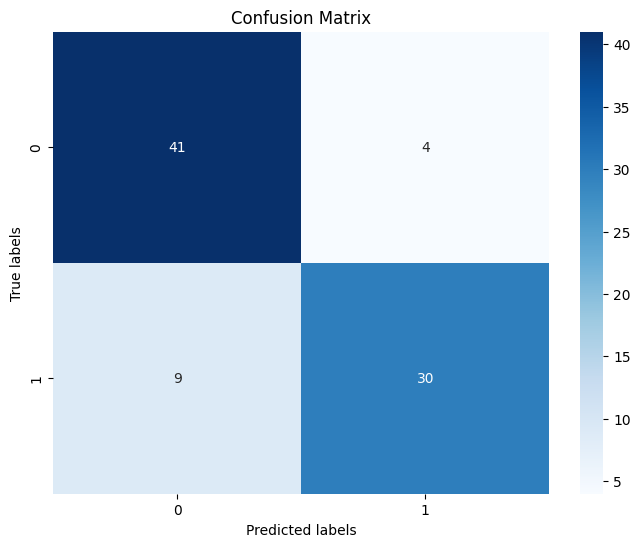

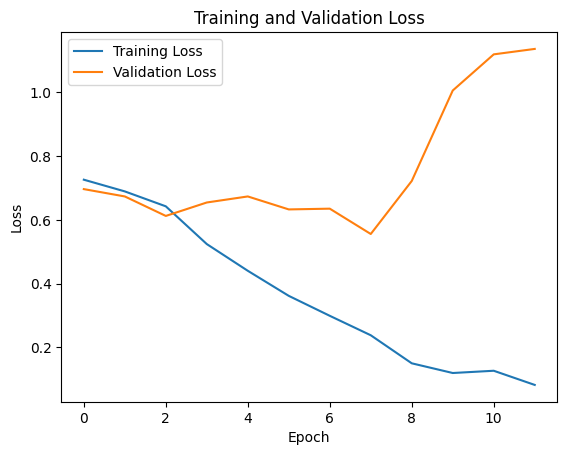

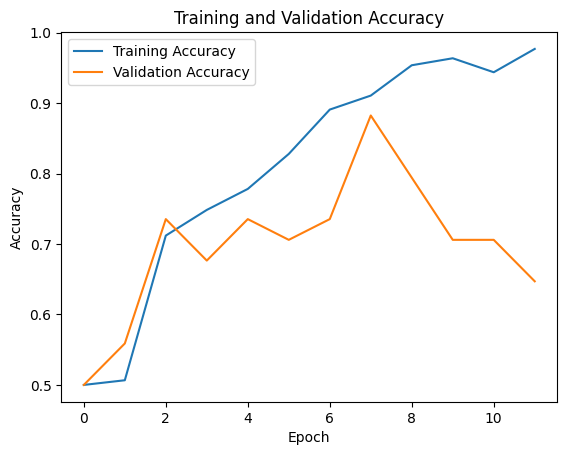

<Figure size 640x480 with 0 Axes>

In [ ]:
# Perform predictions on test set
y_pred_prob = model.predict(X_test_tf)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate evaluation metrics
precision = precision_score(y_test_tf, y_pred)
recall = recall_score(y_test_tf, y_pred)
f1 = f1_score(y_test_tf, y_pred)
conf_matrix = confusion_matrix(y_test_tf, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

precision, recall, _ = precision_recall_curve(y_test_tf, y_pred_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
plt.savefig("Precision-Recall Curve")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_tf, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
plt.savefig("ROC Curve")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion Matrix")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig("Training and Vallidation Loss")
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig("Training and Validation Accuracy")

In [ ]:
#Prediction

In [ ]:
#Testing with different images
# Function to preprocess image

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(image_height, image_width))
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

# Function to classify image and return prediction
def classify_image(image_path, model):
    new_image = preprocess_image(image_path)
    new_image_tf = tf.convert_to_tensor(np.expand_dims(new_image, axis=0))
    prediction = model.predict(new_image_tf)
    return prediction[0][0]

# Path to the folder containing images
image_folder = "/content/drive/MyDrive/Samples1"

# Create an empty DataFrame to store predictions
predictions_df = pd.DataFrame(columns=["Image", "Prediction"])

# Iterate over images in the folder
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)
    prediction = classify_image(img_path, model)
    predictions_df = pd.concat([predictions_df, pd.DataFrame({"Image": [img_name], "Prediction": [prediction]})], ignore_index=True)
# Display predictions in tabular format
print(predictions_df)




1/1 [==============================] - 0s 31ms/step
           Image    Prediction
0  Non_Canc2.PNG  4.440489e-07
1       Canc.PNG  8.710750e-01
2   Non_Canc.PNG  1.210995e-01


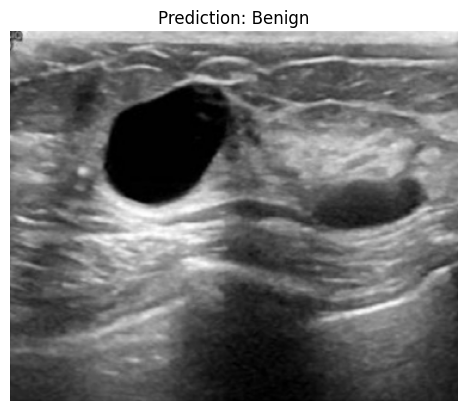

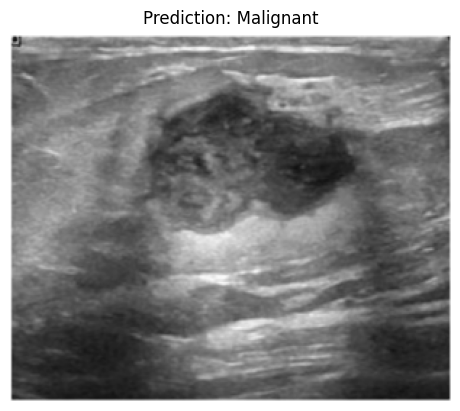

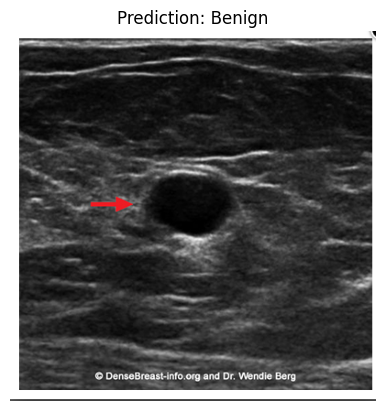

In [ ]:

# Display the input images with their predictions
for index, row in predictions_df.iterrows():
    img_path = os.path.join(image_folder, row["Image"])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title("Prediction: " + ("Malignant" if row["Prediction"] > 0.3 else "Benign"))
    plt.axis("off")
    plt.show()